### Task #2 : Prediction using Unsupervised ML
The **K-Means Clustering Algorithm** is used for this classification problem.

Author : Shubham Yadav


---



In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Load the dataset

data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
tgt = pd.DataFrame(data.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
tgt

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [27]:
df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>



---


For finding the optimal number of clusters (k), the **Elbow** **Method** is used


---



In [4]:
# Implementing the elbow method

dist = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    dist.append(kmeanModel.inertia_)

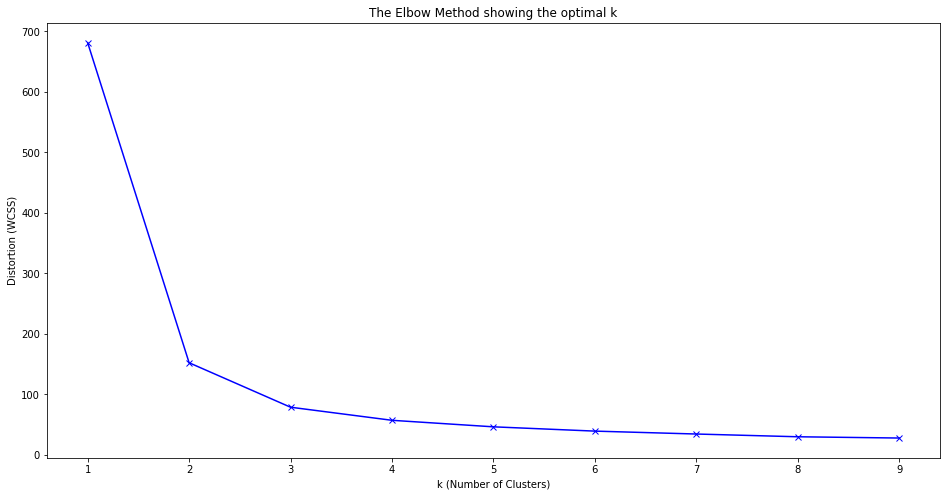

In [5]:
# Plotting the results

plt.figure(figsize=(16,8))
plt.plot(range(1,10), dist, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Distortion (WCSS)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From above figure, the **optimal number of clusters is 3** as beyond that WCSS does not decrease significantly after each iteration.


---



In [28]:
# Fitting the K-Means Classifier to dataset

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)
label = kmeanModel.predict(df)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Actual Plot')

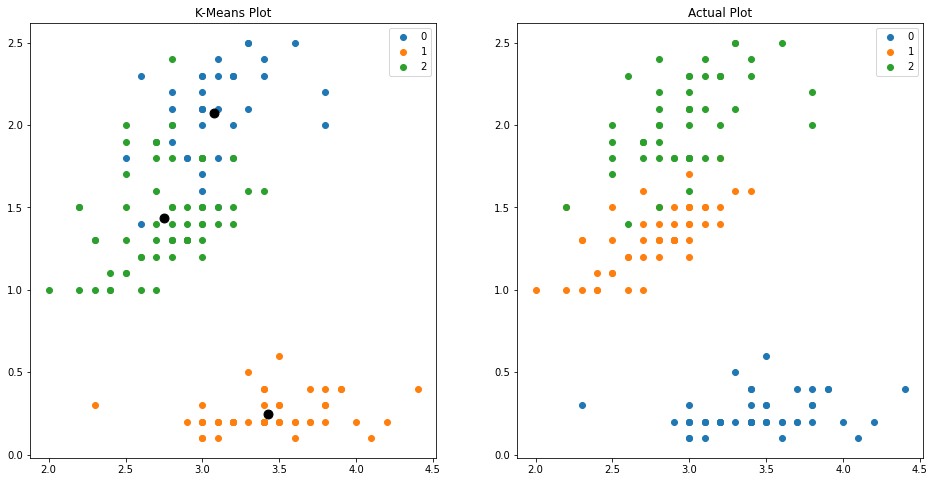

In [34]:
#Plotting and Comparing the prediction with actual values

u_label = np.unique(label)
centroids = kmeanModel.cluster_centers_

fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot of K-Means predictions

for i in u_label:
  temp = df[label == i].values
  axes[0].scatter(temp[:, 1], temp[:, 3], label=i)

axes[0].scatter(centroids[:,1], centroids[:,3], s=80, color='k')
axes[0].legend()
axes[0].set_title("K-Means Plot")

# Plot of actual values

for i in range(0,3):
  temp = tgt[ tgt[0] == i ].index
  temp2 = (df.iloc[temp]).values
  axes[1].scatter(temp2[:,1], temp2[:,3], label=i)

axes[1].legend()
axes[1].set_title("Actual Plot")